In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap

In [3]:
data=pd.read_csv("C:\\Users\\annik\\Downloads\\archive (3)\\sentimentdataset.csv") #edit to own path
print(data)

     Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  Attending a surprise birthday 

In [5]:
data['Country']=data['Country'].str.strip() #remove spaces in order to merge and find unique countries

In [6]:
land=data['Country']
lst=[]
for l in range(len(land)):
    lst.append(land[l]) if land[l] not in lst else lst #Look wihich countries are in our dataset
print(lst)
len(lst)

['USA', 'Canada', 'UK', 'Australia', 'India', 'France', 'Brazil', 'Japan', 'Greece', 'Germany', 'Sweden', 'Italy', 'Netherlands', 'South Africa', 'Spain', 'Portugal', 'Switzerland', 'Austria', 'Belgium', 'Denmark', 'Czech Republic', 'Jordan', 'Peru', 'Maldives', 'China', 'Cambodia', 'Norway', 'Colombia', 'Ireland', 'Jamaica', 'Kenya', 'Scotland', 'Thailand']


33

In [7]:
Country_changed=data['Country'] 
for i in range(len(land)):
    if Country_changed[i]=='Czech Republic':#change some names in order to have the same countynames for GDP and the data
        Country_changed[i]='Czechia'
    if Country_changed[i]=='Scotland':
        Country_changed[i]='United Kingdom'
    if Country_changed[i]=='UK':
        Country_changed[i]='United Kingdom'
    if Country_changed[i]=='USA':
        Country_changed[i]='United States'
index = Country_changed.unique()

print(index)

['United States' 'Canada' 'United Kingdom' 'Australia' 'India' 'France'
 'Brazil' 'Japan' 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands'
 'South Africa' 'Spain' 'Portugal' 'Switzerland' 'Austria' 'Belgium'
 'Denmark' 'Czechia' 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia'
 'Norway' 'Colombia' 'Ireland' 'Jamaica' 'Kenya' 'Thailand']


C:\Users\annik\AppData\Local\Temp\ipykernel_11620\3134983323.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country_changed[i]='United States'
C:\Users\annik\AppData\Local\Temp\ipykernel_11620\3134983323.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country_changed[i]='United States'
C:\Users\annik\AppData\Local\Temp\ipykernel_11620\3134983323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country_changed[i]='United K

In [8]:
data['Country']=Country_changed #check ones more
lst2=[]
for l in range(len(land)):
    lst2.append(Country_changed[l]) if Country_changed[l] not in lst2 else lst2
print(lst2)
len(lst2)

['United States', 'Canada', 'United Kingdom', 'Australia', 'India', 'France', 'Brazil', 'Japan', 'Greece', 'Germany', 'Sweden', 'Italy', 'Netherlands', 'South Africa', 'Spain', 'Portugal', 'Switzerland', 'Austria', 'Belgium', 'Denmark', 'Czechia', 'Jordan', 'Peru', 'Maldives', 'China', 'Cambodia', 'Norway', 'Colombia', 'Ireland', 'Jamaica', 'Kenya', 'Thailand']


32

In [9]:
GDP=pd.read_csv("C:\\Users\\annik\\Downloads\\P_Popular Indicators\\3dfff9f0-ad3d-4289-90a8-9d9b9f1d6f2a_Data.csv")

In [10]:
print(GDP)

                                           Series Name  Series Code  \
0                                    Population, total  SP.POP.TOTL   
1                                    Population, total  SP.POP.TOTL   
2                                    Population, total  SP.POP.TOTL   
3                                    Population, total  SP.POP.TOTL   
4                                    Population, total  SP.POP.TOTL   
...                                                ...          ...   
1600                                               NaN          NaN   
1601                                               NaN          NaN   
1602                                               NaN          NaN   
1603  Data from database: World Development Indicators          NaN   
1604                          Last Updated: 12/16/2024          NaN   

        Country Name Country Code 2010 [YR2010] 2011 [YR2011] 2012 [YR2012]  \
0      United States          USA     309327143     311583481     31

In [11]:
GDP=GDP[np.isin(GDP['Country Name'], lst2)]
GNI_percapita=GDP[np.isin(GDP['Series Name'], ['GNI per capita, PPP (current international $)'])] 
GDP_percapita=GDP[np.isin(GDP['Series Name'], ['GDP per capita (current US$)'])]
dataframe = pd.merge(data, GDP_percapita, left_on='Country', right_on='Country Name', how='left')#,suffixes=('_data', '_GDP'))
#print(GDP) 
#print(GNI_percapita)
years = ['2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
        '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
for year in years:
    dataframe[year] = pd.to_numeric(dataframe[year], errors='coerce')
    dataframe[year] = dataframe[year].round(0).astype('Int64')
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'])
dataframe['Year'] = dataframe['Timestamp'].dt.year
print(dataframe)

     Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  Attending a surprise birthday 

In [12]:
analyzer=SentimentIntensityAnalyzer()
posts=dataframe['Text'].values
compound=[]
#print(posts)
for p in posts:
    a=analyzer.polarity_scores(p)
    compound.append(a['compound'])
dataframe['VADER_compound']=compound
print(compound)

[0.8221, -0.4767, 0.6239, 0.4003, 0.0, 0.5423, -0.0772, 0.0, 0.0, -0.296, 0.0, 0.128, 0.0, 0.3382, 0.0, 0.0, 0.7574, 0.4767, 0.0, -0.1531, 0.743, 0.0, 0.0, 0.1531, 0.7712, 0.4767, 0.3818, 0.4404, 0.3612, 0.4753, 0.0, 0.5267, 0.4404, 0.5719, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34, 0.0, 0.6114, 0.5267, 0.4404, 0.0, 0.5093, 0.0, 0.5859, 0.765, 0.4215, 0.4003, 0.0, 0.4585, -0.3182, -0.7845, -0.5267, 0.9098, 0.872, 0.8977, 0.7177, 0.5267, 0.8625, 0.4926, 0.4588, -0.4767, 0.8172, 0.5106, 0.8122, 0.6597, 0.0772, 0.4019, -0.296, 0.5411, 0.802, 0.34, -0.7783, -0.872, -0.4939, 0.7506, -0.5709, 0.7777, 0.6908, 0.8784, 0.68, 0.807, 0.6597, 0.7184, 0.5859, -0.3818, 0.802, 0.4588, 0.8883, 0.0, -0.4215, -0.25, -0.296, 0.7906, 0.4588, 0.6597, -0.7783, 0.5859, 0.7269, -0.3182, 0.4019, -0.296, 0.4939, 0.7906, 0.34, -0.6407, 0.4588, 0.6486, 0.743, 0.7579, 0.7783, 0.6886, 0.0, 0.8271, 0.7717, 0.743, 0.5994, 0.3182, 0.6249, 0.7717, 0.6486, 0.3612, 0.4588, 0.6705, 0.5106, 0.3818, 0.6808, 0.7003, 0.6705, 0.7003, 0.15

In [28]:
print(dataframe['Country'])

0       United States
1              Canada
2       United States
3      United Kingdom
4           Australia
            ...      
727    United Kingdom
728     United States
729            Canada
730    United Kingdom
731     United States
Name: Country, Length: 732, dtype: object


ValueError: left cannot be >= right

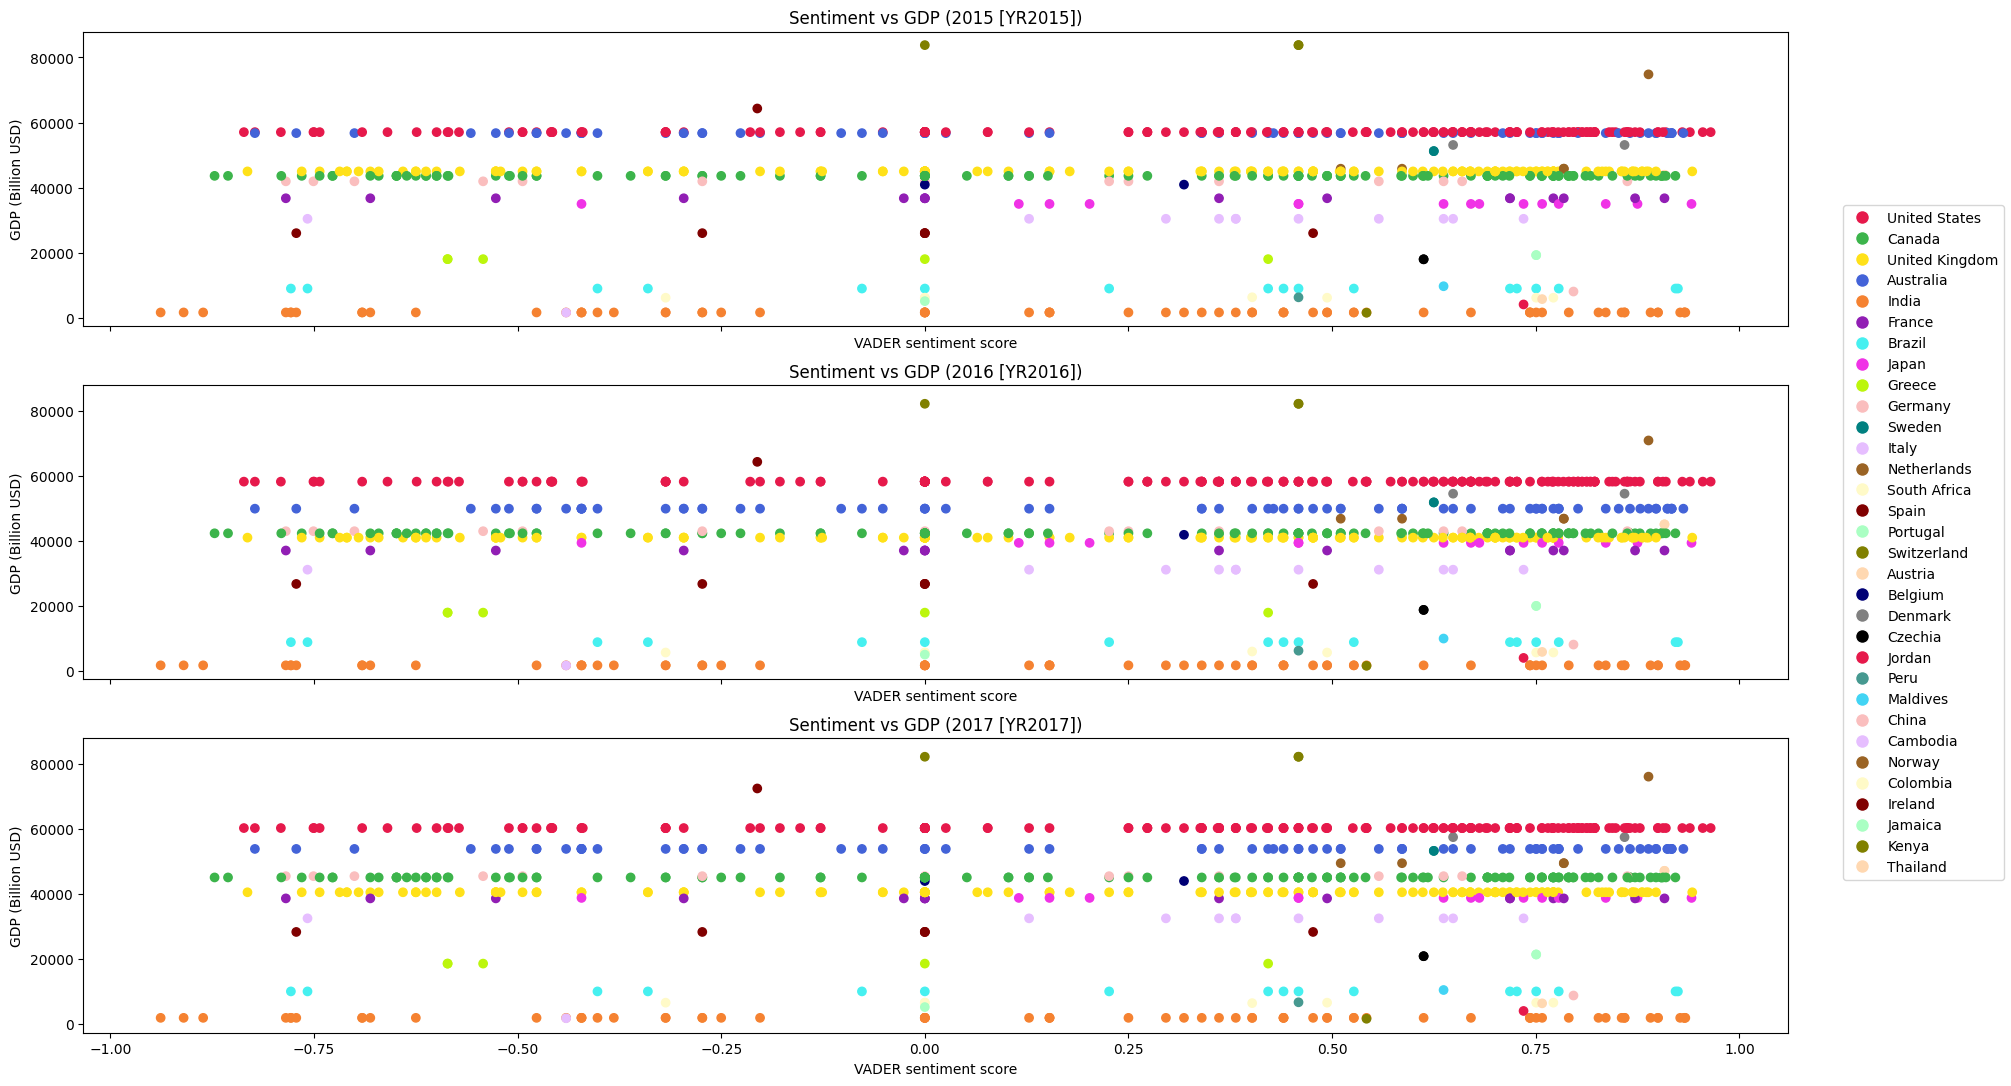

In [18]:
#PLOTTING
colormap = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
    '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
    '#808000', '#ffd8b1', '#000075', '#808080', '#000000', '#e6194b', '#469990', '#42d4f4',
    '#fabebe', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1'
]
cmap = ListedColormap(colormap)
dataframe.sort_values(by=['2023 [YR2023]'])
dataframe['Country_Label'] = pd.factorize(dataframe['Country'])[0]

#list of years
years = [ '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]']#, '2018 [YR2018]',
        # '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
#years=['2023 [YR2023]']
#years=[ '2014 [YR2014]','2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
        # '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
dataframe['Country_Label'] = pd.factorize(dataframe['Country'])[0]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(22, 13), sharex=True, sharey=True)
axes = axes.flatten()

for i, year in enumerate(years):
    scatter = axes[i].scatter(dataframe['VADER_compound'], dataframe[year], 
                              c=dataframe['Country_Label'], cmap=cmap)
    axes[i].set_title(f'Sentiment vs GDP ({year})')
    axes[i].set_xlabel('VADER sentiment score')
    axes[i].set_ylabel('GDP (Billion USD)')
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=5))

handles, labels = [], []
for label, country in enumerate(dataframe['Country'].unique()):
    handles.append(Line2D([0], [0], marker='o', color='w', label=country, markerfacecolor=cmap(label), markersize=10))
    labels.append(country)

fig.legend(handles=handles, labels=labels, loc='center right')#, bbox_to_anchor=(0.5, 1.05), ncol=5)
plt.subplots_adjust(right=0.1) 
plt.tight_layout()
plt.show()

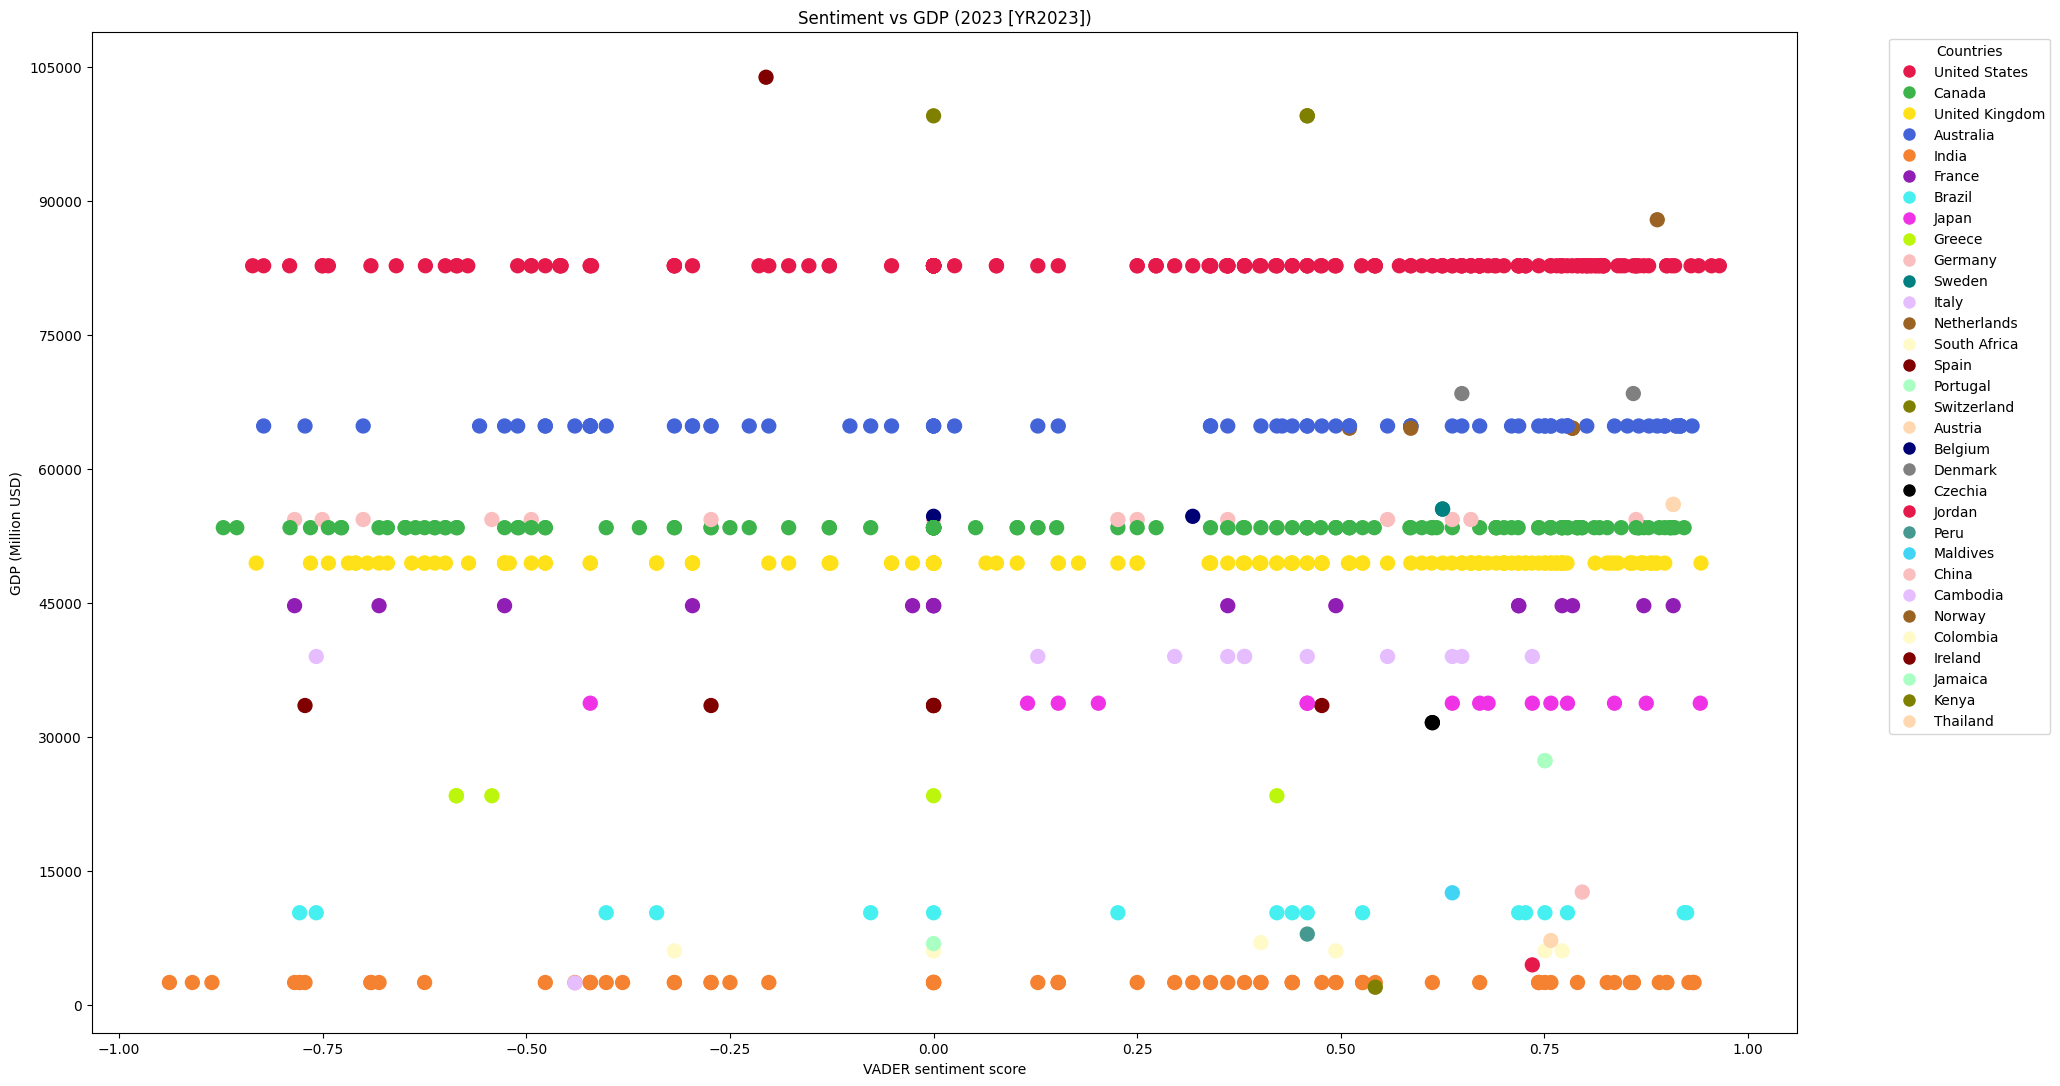

In [19]:
dataframe['2023 [YR2023]'] = pd.to_numeric(dataframe['2023 [YR2023]'], errors='coerce')
dataframe.sort_values(by=['2023 [YR2023]'])
dataframe['Country_Label'] = pd.factorize(dataframe['Country'])[0]

#plot
plt.figure(figsize=(22, 13))
plt.scatter(dataframe['VADER_compound'], dataframe['2023 [YR2023]'], c=dataframe['Country_Label'], cmap=cmap, s=100)
plt.legend(handles=handles, title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.colorbar(scatter, label='Country')
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.xlabel('VADER sentiment score')
plt.ylabel('GDP (Million USD)')
plt.title('Sentiment vs GDP (2023 [YR2023])')

plt.show()

In [11]:
series=GDP['Series Name'] #look which properties we have
ind = series.unique()

print(ind)

['Population, total' 'Population growth (annual %)'
 'Surface area (sq. km)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'GNI, Atlas method (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'GNI, PPP (current international $)'
 'GNI per capita, PPP (current international $)'
 'Income share held by lowest 20%'
 'Life expectancy at birth, total (years)'
 'Fertility rate, total (births per woman)'
 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Contraceptive prevalence, any method (% of married women ages 15-49)'
 'Births attended by skilled health staff (% of total)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Immunization, measles (% of children ages 12-23 months)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, secondary (% gross)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Prevale

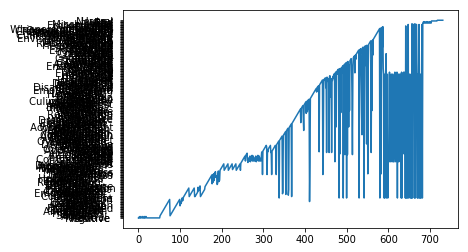

<Figure size 1440x2160 with 0 Axes>

In [115]:
plt.plot(dataframe['Sentiment'])
plt.figure(figsize =(20, 30))
plt.show()

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

def vader(text): #from excercise 3
    scores = sentiment.polarity_scores(text)
    compound = scores['compound']  # Overall sentiment score
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

C:\Programs\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D1664890B8>,
      dtype=object)

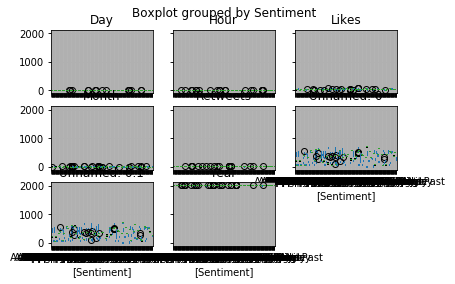

In [19]:
#dataframe.boxplot(by='Sentiment')

In [22]:
dataframe['Sentiment']=dataframe['Sentiment'].str.strip()
sentiments=dataframe['Sentiment'] #look which properties we have
all_sentiments = sentiments.unique()

print(all_sentiments)

['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation'
 'Bitter' 'Calmness' 'Confusion' 'Excitement' 'Kind' 'Pride' 'Shame'
 'Elation' 'Euphoria' 'Contentment' 'Serenity' 'Gratitude' 'Hope'
 'Empowerment' 'Compassion' 'Tenderness' 'Arousal' 'Enthusiasm'
 'Fulfillment' 'Reverence' 'Despair' 'Grief' 'Loneliness' 'Jealousy'
 'Resentment' 'Frustration' 'Boredom' 'Anxiety' 'Intimidation'
 'Helplessness' 'Envy' 'Regret' 'Curiosity' 'Indifference' 'Numbness'
 'Melancholy' 'Nostalgia' 'Ambivalence' 'Determination' 'Zest' 'Hopeful'
 'Proud' 'Grateful' 'Empathetic' 'Compassionate' 'Playful' 'Free-spirited'
 'Inspired' 'Confident' 'Bitterness' 'Yearning' 'Fearful' 'Apprehensive'
 'Overwhelmed' 'Jealous' 'Devastated' 'Frustrated' 'Envious' 'Dismissive'
 'Thrill' 'Bittersweet' 'Overjoyed' 'Inspiration' 'Motivation'
 'Contemplation' 'JoyfulR

In [158]:
country_counts = dataframe['Country'].value_counts()
countries_10 = country_counts[country_counts > 10].index.tolist()
#print(country_counts)
# countries_10 = pd.DataFrame()
# countries_10['Country']=countries
# print(countries_10)

In [171]:
filtered = GDP_percapita[GDP_percapita['Country Name'].isin(countries_10)]
#print(filtered)
mean_sentiment = dataframe.groupby(['Country', 'Year'])['VADER_compound'].mean().reset_index()
mean_sentiment =mean_sentiment[mean_sentiment['Country'].isin(countries_10)]
#selected= pd.merge(mean_sentiment,countries_10, left_on='Country', right_on='Country', how='left')
meanGDP = pd.merge(mean_sentiment, filtered, left_on='Country', right_on='Country Name', how='left')
#print(meanGDP)

years = ['2011 [YR2011]', '2012 [YR2012]','2013 [YR2013]',  '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
        '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
for year in years:
    meanGDP[year] = pd.to_numeric(meanGDP[year], errors='coerce')
    meanGDP[year] = meanGDP[year].round(0).astype('Int64')

meanGDP.columns = [re.sub(r'\s\[.*\]', '', col) for col in meanGDP.columns]
print(meanGDP.columns)
print(meanGDP)

Index(['Country', 'Year', 'VADER_compound', 'Series Name', 'Series Code',
       'Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')
          Country  Year  VADER_compound                   Series Name  \
0       Australia  2010        0.361200  GDP per capita (current US$)   
1       Australia  2012        0.768100  GDP per capita (current US$)   
2       Australia  2015       -0.089200  GDP per capita (current US$)   
3       Australia  2016       -0.421500  GDP per capita (current US$)   
4       Australia  2017        0.372350  GDP per capita (current US$)   
..            ...   ...             ...                           ...   
84  United States  2019        0.526791  GDP per capita (current US$)   
85  United States  2020        0.436680  GDP per capita (current US$)   
86  United States  2021        0.255086  GDP per capita (current US$)   
87  United Stat

In [163]:
meanGDP['Country'].value_counts()

India             13
United States     12
Canada            12
Australia         11
United Kingdom    11
France             7
Brazil             7
Japan              6
Germany            6
Italy              4
Name: Country, dtype: int64

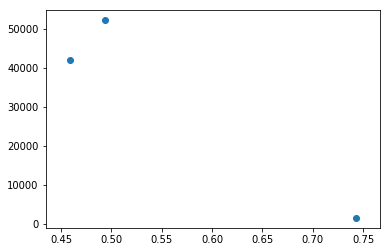

Pearson correlation coefficient2011: -0.9545097945327992
P-value: 0.19275884728047363


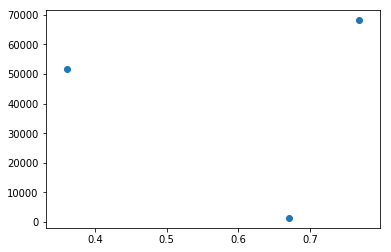

Pearson correlation coefficient2012: -0.05515382426566242
P-value: 0.9648701590727412


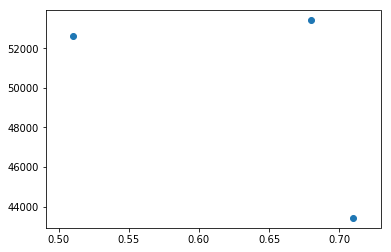

Pearson correlation coefficient2013: -0.5601573771647991
P-value: 0.6214813097763594


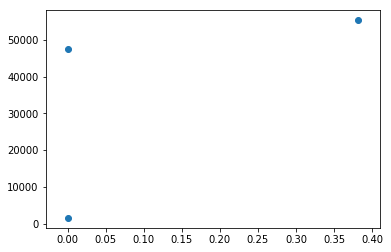

Pearson correlation coefficient2014: 0.6126922784150999
P-value: 0.5801730239655419


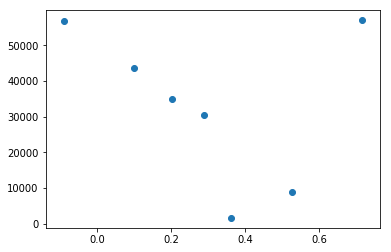

Pearson correlation coefficient2015: -0.25490276392279976
P-value: 0.5811841412874184


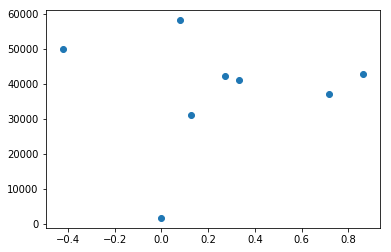

Pearson correlation coefficient2016: 0.028816046221235382
P-value: 0.9459998156623558


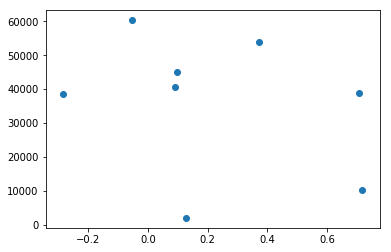

Pearson correlation coefficient2017: -0.30649550258073727
P-value: 0.4602967070096959


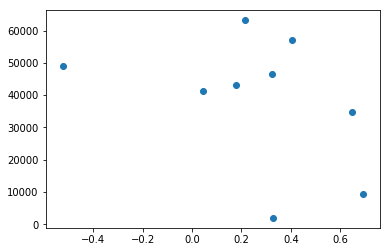

Pearson correlation coefficient2018: -0.3990763165107343
P-value: 0.28732333007713734


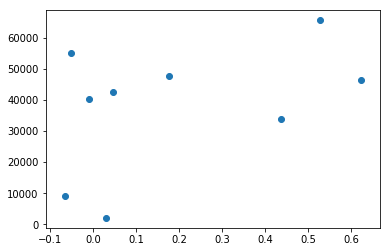

Pearson correlation coefficient2019: 0.44596502771703855
P-value: 0.22891137761877842


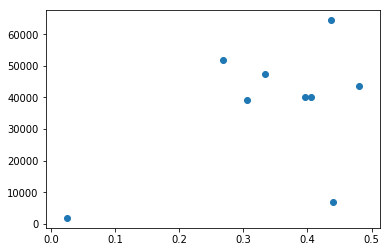

Pearson correlation coefficient2020: 0.4845229464649316
P-value: 0.1862260755266039


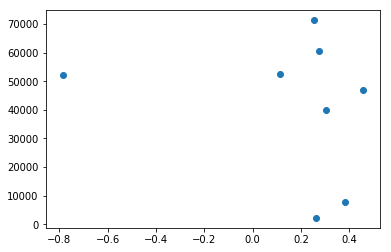

Pearson correlation coefficient2021: -0.2324082524538719
P-value: 0.5796717670011085


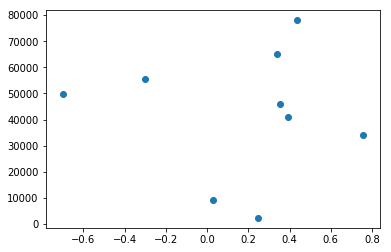

Pearson correlation coefficient2022: -0.026810083036466238
P-value: 0.9454156514772337


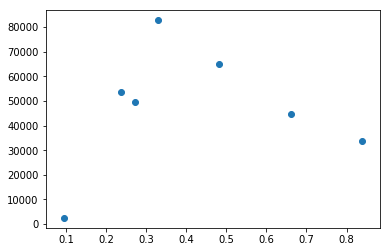

Pearson correlation coefficient2023: 0.12003371198521975
P-value: 0.7976892719513059


In [175]:
years = [str(year) for year in range(2011, 2024)] 
for year in years:
    selected = meanGDP[meanGDP['Year'] == int(year)]
    #print(filtered_data)
    plt.scatter(selected['VADER_compound'], selected[str(year)])
    plt.show()
    vader_compound = selected['VADER_compound']
    year_values = selected[str(year)]
    correlation, p_value = pearsonr(vader_compound, year_values)    
    print(f"Pearson correlation coefficient{year}: {correlation}")
    print(f"P-value: {p_value}")

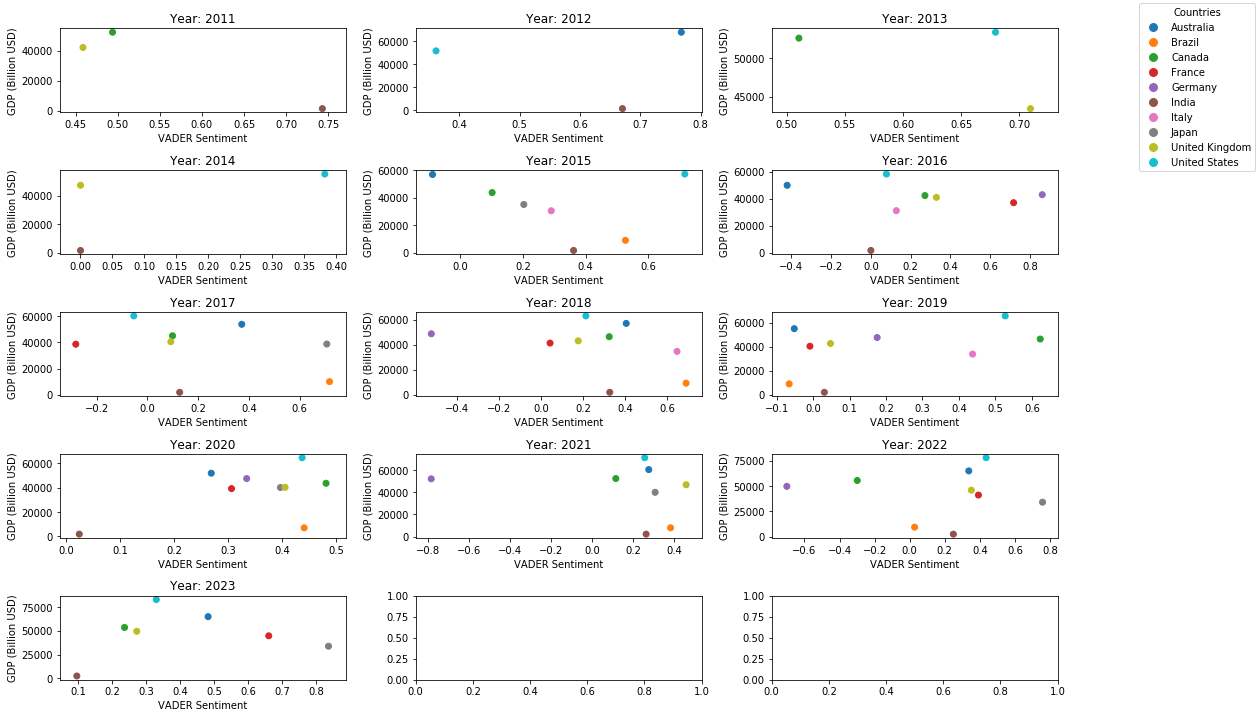

In [186]:
countries = meanGDP['Country'].unique()
colormap = plt.cm.get_cmap('tab10', len(countries)) 
country_to_color = {country: colormap(i) for i, country in enumerate(countries)}

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))  # 4 rows, 3 columns for 12 years
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate over

#reate a subplot for each year
for idx, year in enumerate(years):
    selected = meanGDP[meanGDP['Year'] == int(year)]
    colors = selected['Country'].map(country_to_color)
    axes[idx].scatter(selected['VADER_compound'], selected[str(year)], color=colors)
    axes[idx].set_title(f"Year: {year}")
    axes[idx].set_xlabel('VADER Sentiment')
    axes[idx].set_ylabel(f'GDP (Billion USD)')
    

    vader_compound = selected['VADER_compound']
    year_values = selected[str(year)]
    correlation, p_value = pearsonr(vader_compound, year_values)

#avoid overlap
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=country_to_color[country], markersize=10) 
           for country in countries]
labels = list(countries)
fig.legend(handles, labels, title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [3]:
years = [str(year) for year in range(2010, 2024)]
corr=[]
pv=[]
for year in years:
    correlation, p_value = pearsonr(meanGDP['VADER_compound'], meanGDP[year])
    corr.append(correlation)
    pv.append(p_value)
    #print(f"Pearson correlation coefficient: {correlation}")
    #print(f"P-value: {p_value}")
df = pd.DataFrame({
    'Year': years,
    'Pearsonnumber': corr,
    'P-value': pv
})
print(df)

NameError: name 'meanGDP' is not defined

In [28]:
df = GDP_percapita[GDP_percapita['Country Name'].isin(['United States'])]
#print(df)
df.columns = [re.sub(r'\s\[.*\]', '', col) for col in df.columns]
row_to_transform = df.iloc[0, 4:]
new_df = pd.DataFrame({
    'GDP': row_to_transform.values,'Year':row_to_transform.index})
#print(new_df)
mean_sentiment = dataframe.groupby(['Country', 'Year'])['VADER_compound'].mean().reset_index()
mean_sentiment =mean_sentiment[mean_sentiment['Country'].isin(['United States'])]
#print(mean_sentiment)
mean_sentiment['Year'] = mean_sentiment['Year'].astype(int)
new_df['Year'] = new_df['Year'].astype(int)
US=pd.merge(mean_sentiment, new_df, left_on='Year', right_on='Year', how='left')
US['GDP'] = pd.to_numeric(US['GDP'], errors='coerce')
US['GDP'] = US['GDP'].round(0).astype(int)
print(US)

          Country  Year  VADER_compound    GDP
0   United States  2012        0.361200  51784
1   United States  2013        0.679550  53410
2   United States  2014        0.381800  55304
3   United States  2015        0.716350  57040
4   United States  2016        0.078367  58207
5   United States  2017       -0.053325  60322
6   United States  2018        0.214269  63201
7   United States  2019        0.526791  65605
8   United States  2020        0.436680  64411
9   United States  2021        0.255086  71318
10  United States  2022        0.436000  78035
11  United States  2023        0.329935  82769


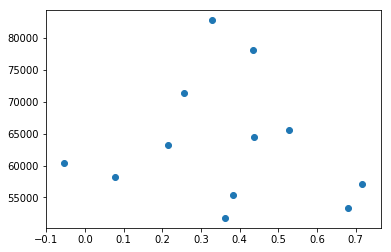

Pearson correlation coefficient: -0.1147339420835197
P-value: 0.7225444073353808


In [204]:
plt.scatter(US['VADER_compound'], US['GDP'])
plt.show()
correlation, p_value = pearsonr(US['VADER_compound'], US['GDP'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

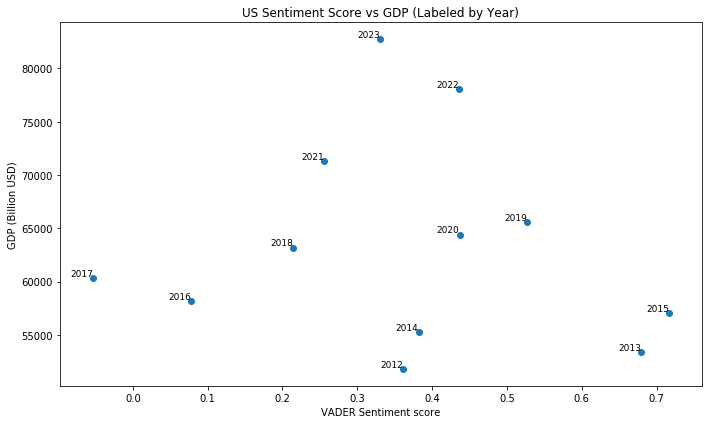

In [207]:
plt.figure(figsize=(10, 6))
plt.scatter(US['VADER_compound'], US['GDP'])

# Add labels for each point
for i, row in US.iterrows():
    plt.text(row['VADER_compound'], row['GDP'], str(row['Year']), fontsize=9, ha='right', va='bottom')

# Add labels and title
plt.xlabel('VADER Sentiment score')
plt.ylabel('GDP (Billion USD)')
plt.title('US Sentiment Score vs GDP (Labeled by Year)')
#plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


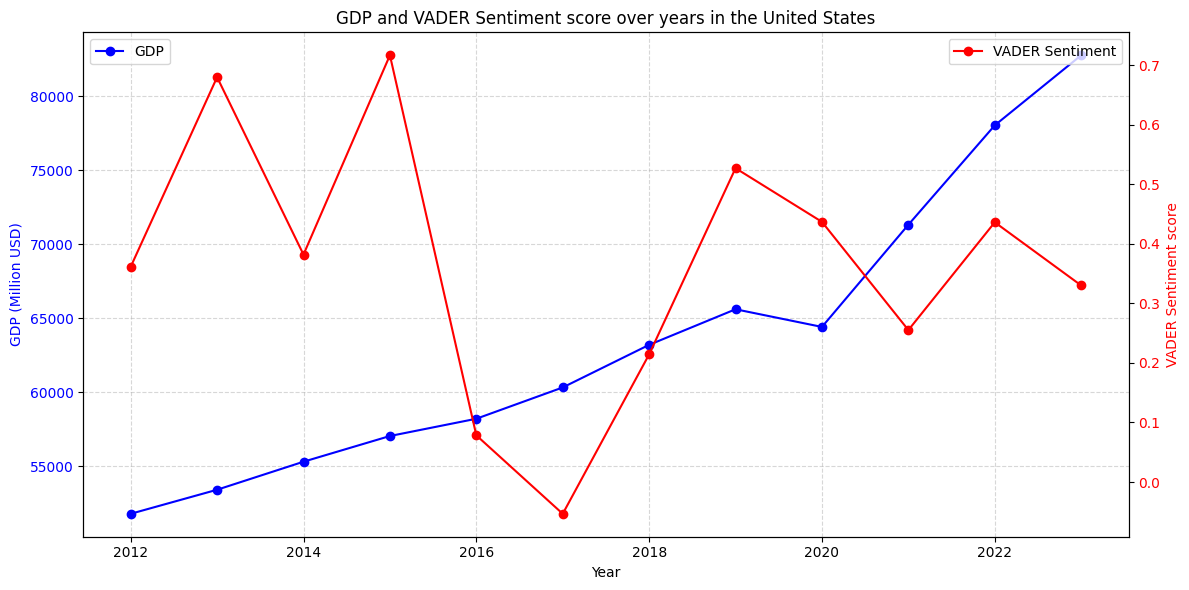

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))
#gdp
ax1.plot(US['Year'], US['GDP'], color='blue', marker='o', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Million USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

#sentiment
ax2 = ax1.twinx()
ax2.plot(US['Year'], US['VADER_compound'], color='red', marker='o', label='VADER Sentiment')
ax2.set_ylabel('VADER Sentiment score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('GDP and VADER Sentiment score over years in the United States')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [217]:
list4=['United States', 'Canada','United Kingdom','India']

   Country  Year  VADER_compound    GDP
0   Canada  2010        0.458800  47561
1   Canada  2011        0.493900  52224
2   Canada  2013        0.510600  52638
3   Canada  2015        0.101100  43594
4   Canada  2016        0.272020  42314
5   Canada  2017        0.099325  45130
6   Canada  2018        0.325514  46539
7   Canada  2019        0.622800  46353
8   Canada  2020        0.480913  43538
9   Canada  2021        0.114540  52497
10  Canada  2022       -0.298991  55509
11  Canada  2023        0.236258  53431


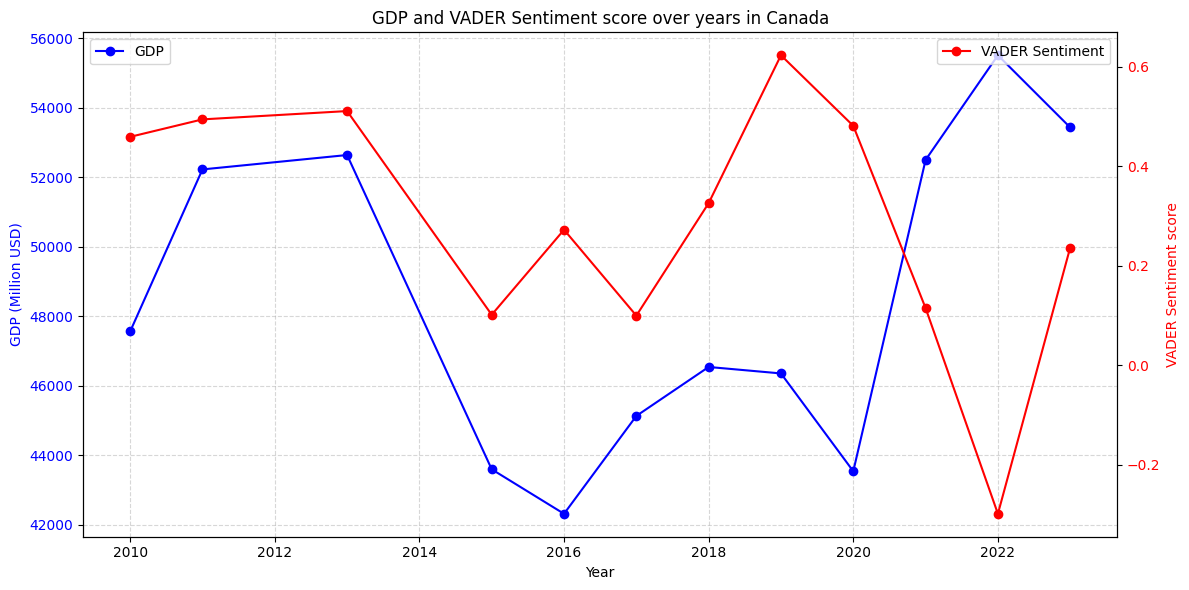

Pearson correlation coefficient: -0.28375929284442214
P-value: 0.37142861866813154


In [24]:
df = GDP_percapita[GDP_percapita['Country Name'].isin(['Canada'])]
#print(df)
df.columns = [re.sub(r'\s\[.*\]', '', col) for col in df.columns]
row_to_transform = df.iloc[0, 4:]
new_df = pd.DataFrame({
    'GDP': row_to_transform.values,'Year':row_to_transform.index})
#print(new_df)
mean_sentiment = dataframe.groupby(['Country', 'Year'])['VADER_compound'].mean().reset_index()
mean_sentiment =mean_sentiment[mean_sentiment['Country'].isin(['Canada'])]
#print(mean_sentiment)
mean_sentiment['Year'] = mean_sentiment['Year'].astype(int)
new_df['Year'] = new_df['Year'].astype(int)
US=pd.merge(mean_sentiment, new_df, left_on='Year', right_on='Year', how='left')
US['GDP'] = pd.to_numeric(US['GDP'], errors='coerce')
US['GDP'] = US['GDP'].round(0).astype(int)
print(US)

#plot
fig, ax1 = plt.subplots(figsize=(12, 6))

#Gdp
ax1.plot(US['Year'], US['GDP'], color='blue', marker='o', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Million USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

#sentiment
ax2 = ax1.twinx()
ax2.plot(US['Year'], US['VADER_compound'], color='red', marker='o', label='VADER Sentiment')
ax2.set_ylabel('VADER Sentiment score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('GDP and VADER Sentiment score over years in Canada')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()
correlation, p_value = pearsonr(US['VADER_compound'], US['GDP'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

           Country  Year  VADER_compound    GDP
0   United Kingdom  2011        0.458800  42110
1   United Kingdom  2013        0.709600  43426
2   United Kingdom  2014        0.000000  47440
3   United Kingdom  2016        0.329718  40985
4   United Kingdom  2017        0.092671  40572
5   United Kingdom  2018        0.177944  43204
6   United Kingdom  2019        0.047744  42663
7   United Kingdom  2020        0.405158  40202
8   United Kingdom  2021        0.457020  46897
9   United Kingdom  2022        0.351786  45936
10  United Kingdom  2023        0.272410  49464


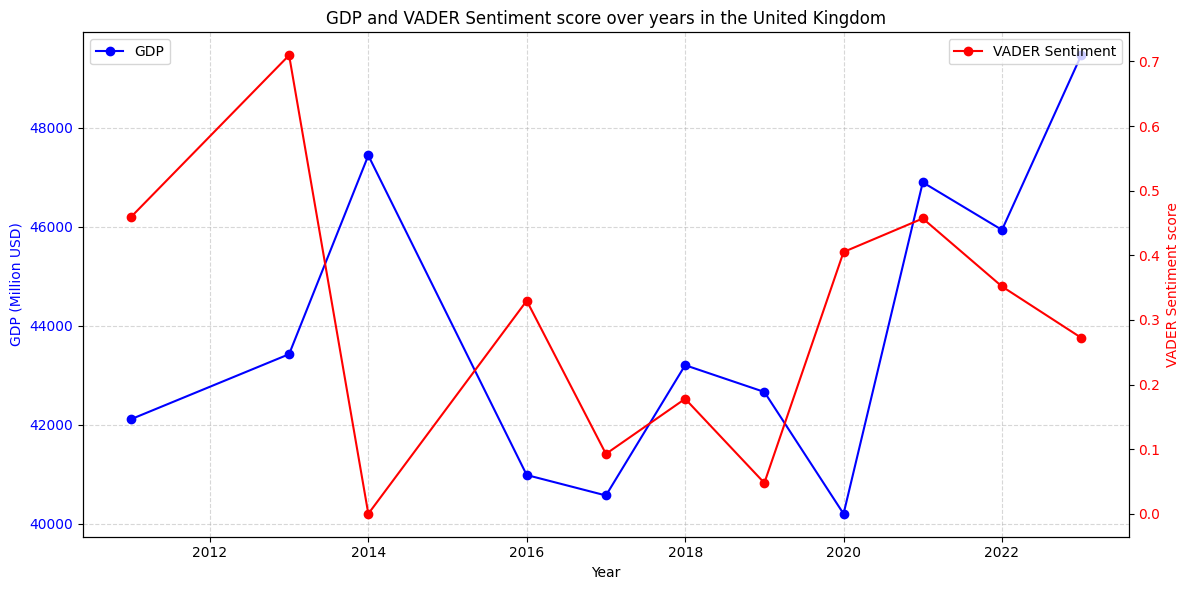

Pearson correlation coefficient: -0.07780044039071535
P-value: 0.8201376158554547


In [25]:
df = GDP_percapita[GDP_percapita['Country Name'].isin(['United Kingdom'])]
#print(df)
df.columns = [re.sub(r'\s\[.*\]', '', col) for col in df.columns]
row_to_transform = df.iloc[0, 4:]
new_df = pd.DataFrame({
    'GDP': row_to_transform.values,'Year':row_to_transform.index})
#print(new_df)
mean_sentiment = dataframe.groupby(['Country', 'Year'])['VADER_compound'].mean().reset_index()
mean_sentiment =mean_sentiment[mean_sentiment['Country'].isin(['United Kingdom'])]
#print(mean_sentiment)
mean_sentiment['Year'] = mean_sentiment['Year'].astype(int)
new_df['Year'] = new_df['Year'].astype(int)
US=pd.merge(mean_sentiment, new_df, left_on='Year', right_on='Year', how='left')
US['GDP'] = pd.to_numeric(US['GDP'], errors='coerce')
US['GDP'] = US['GDP'].round(0).astype(int)
print(US)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(US['Year'], US['GDP'], color='blue', marker='o', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Million USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(US['Year'], US['VADER_compound'], color='red', marker='o', label='VADER Sentiment')
ax2.set_ylabel('VADER Sentiment score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('GDP and VADER Sentiment score over years in the United Kingdom')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()
correlation, p_value = pearsonr(US['VADER_compound'], US['GDP'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

   Country  Year  VADER_compound   GDP
0    India  2010        0.827100  1348
1    India  2011        0.743000  1445
2    India  2012        0.670500  1429
3    India  2014        0.000000  1554
4    India  2015        0.361200  1584
5    India  2016        0.000000  1708
6    India  2017        0.127467  1950
7    India  2018        0.328075  1966
8    India  2019        0.030960  2041
9    India  2020        0.024410  1907
10   India  2021        0.262129  2240
11   India  2022        0.249386  2353
12   India  2023        0.095668  2481


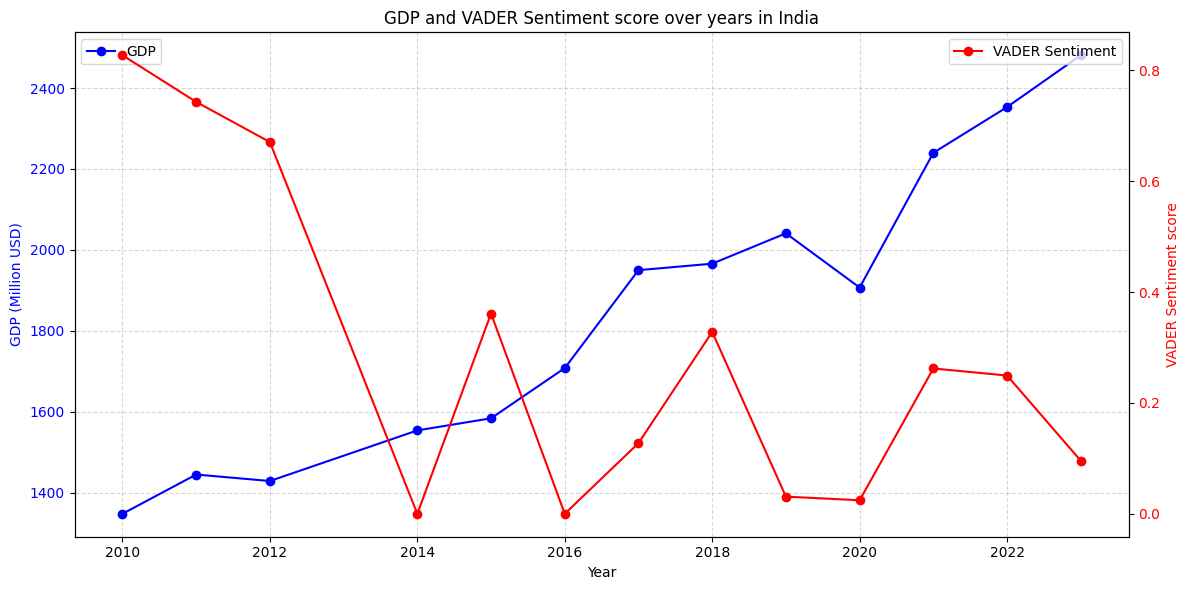

Pearson correlation coefficient: -0.5699573623880773
P-value: 0.04198840053103177


In [26]:
df = GDP_percapita[GDP_percapita['Country Name'].isin(['India'])]
#print(df)
df.columns = [re.sub(r'\s\[.*\]', '', col) for col in df.columns]
row_to_transform = df.iloc[0, 4:]
new_df = pd.DataFrame({
    'GDP': row_to_transform.values,'Year':row_to_transform.index})
#print(new_df)
mean_sentiment = dataframe.groupby(['Country', 'Year'])['VADER_compound'].mean().reset_index()
mean_sentiment =mean_sentiment[mean_sentiment['Country'].isin(['India'])]
#print(mean_sentiment)
mean_sentiment['Year'] = mean_sentiment['Year'].astype(int)
new_df['Year'] = new_df['Year'].astype(int)
US=pd.merge(mean_sentiment, new_df, left_on='Year', right_on='Year', how='left')
US['GDP'] = pd.to_numeric(US['GDP'], errors='coerce')
US['GDP'] = US['GDP'].round(0).astype(int)
print(US)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(US['Year'], US['GDP'], color='blue', marker='o', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Million USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(US['Year'], US['VADER_compound'], color='red', marker='o', label='VADER Sentiment')
ax2.set_ylabel('VADER Sentiment score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('GDP and VADER Sentiment score over years in India')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()
correlation, p_value = pearsonr(US['VADER_compound'], US['GDP'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")